In [68]:
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 


CSV_FILE_NAME = "DataFiles/qc aggregated data.csv"
raw_data = pd.read_csv(CSV_FILE_NAME)

raw_data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,quezon city,2020-01-01,29.3,24.5,26.9,32.3,24.5,28.7,22.6,77.4,...,7.0,3,NaN,2020-01-01T06:20:49,2020-01-01T17:37:11,0.19,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"98429099999,RPLC,98327099999,98428099999,RPLL,..."
1,quezon city,2020-01-02,31.0,24.7,27.6,35.4,24.7,29.2,21.9,72.1,...,8.1,4,NaN,2020-01-02T06:21:11,2020-01-02T17:37:45,0.22,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"98429099999,RPLC,98327099999,98428099999,RPLL,..."
2,quezon city,2020-01-03,31.9,22.8,27.1,34.2,22.8,28.0,19.7,65.0,...,7.7,4,NaN,2020-01-03T06:21:33,2020-01-03T17:38:20,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"98429099999,RPLC,98327099999,98428099999,RPLL,..."
3,quezon city,2020-01-04,31.2,21.6,26.8,34.4,21.6,27.9,20.3,68.7,...,8.3,4,NaN,2020-01-04T06:21:54,2020-01-04T17:38:55,0.29,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"98429099999,RPLC,98327099999,98428099999,RPLL,..."
4,quezon city,2020-01-05,30.9,23.3,27.1,33.0,23.3,28.2,21.1,71.0,...,8.9,4,NaN,2020-01-05T06:22:14,2020-01-05T17:39:30,0.32,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"98429099999,RPLC,98327099999,98428099999,RPLL,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,quezon city,2023-07-27,30.8,25.7,27.8,38.8,25.7,32.4,25.4,86.5,...,5.5,3,30.0,2023-07-27T05:37:39,2023-07-27T18:27:01,0.31,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"98429099999,C6CX3,98327099999,98428099999,RPLL..."
1304,quezon city,2023-07-28,29.9,24.2,26.9,37.3,24.2,29.6,24.9,89.5,...,7.3,4,60.0,2023-07-28T05:37:54,2023-07-28T18:26:44,0.35,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"98429099999,C6CX3,98327099999,98428099999,RPLL..."
1305,quezon city,2023-07-29,29.4,21.9,25.7,36.3,21.9,26.9,25.0,94.9,...,7.2,5,30.0,2023-07-29T05:38:09,2023-07-29T18:26:25,0.38,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"98429099999,98327099999,98428099999,RPLL,98430..."
1306,quezon city,2023-07-30,28.0,24.9,26.6,34.5,24.9,29.0,25.1,92.0,...,7.9,5,30.0,2023-07-30T05:38:24,2023-07-30T18:26:06,0.41,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"98429099999,C6CX3,98327099999,98428099999,RPLL..."


In [69]:
input_columns = ["tempmin", "tempmax", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed"]
output_columns = ['precipprob']

data_copy = pd.DataFrame()
data_copy[input_columns] = raw_data[input_columns]
data_copy[output_columns] = raw_data[output_columns]
data_copy[output_columns] = data_copy[output_columns].shift(-1)
data_copy = data_copy.dropna()

data_copy


,tempmin,tempmax,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,precipprob
0,24.5,29.3,26.9,32.3,24.5,28.7,22.6,77.4,8.8,100.0
1,24.7,31.0,27.6,35.4,24.7,29.2,21.9,72.1,16.7,0.0
2,22.8,31.9,27.1,34.2,22.8,28.0,19.7,65.0,17.1,100.0
3,21.6,31.2,26.8,34.4,21.6,27.9,20.3,68.7,11.1,100.0
4,23.3,30.9,27.1,33.0,23.3,28.2,21.1,71.0,17.2,0.0
...,...,...,...,...,...,...,...,...,...,...
1302,24.1,30.0,27.9,38.6,24.1,32.9,25.6,87.3,23.6,100.0
1303,25.7,30.8,27.8,38.8,25.7,32.4,25.4,86.5,16.7,100.0
1304,24.2,29.9,26.9,37.3,24.2,29.6,24.9,89.5,14.6,100.0
1305,21.9,29.4,25.7,36.3,21.9,26.9,25.0,94.9,11.2,100.0


In [70]:
training_dataset = data_copy.sample(frac=0.8, random_state=0)
testing_dataset = data_copy.drop(training_dataset.index)

train_features = training_dataset[input_columns]
train_labels = training_dataset[output_columns]

test_features = testing_dataset[input_columns]
test_labels = testing_dataset[output_columns]

In [71]:
base_ann_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(9, )),
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1)
    ]
)

base_ann_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 1024)              10240     
                                                                 
 dense_35 (Dense)            (None, 512)               524800    
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dense_37 (Dense)            (None, 64)                16448     
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 682,881
Trainable params: 682,881
Non-trainable params: 0
_________________________________________________________________


In [72]:
base_ann_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = "mae",
    )

history = base_ann_model.fit(
    train_features,
    train_labels,
    epochs = 50,
    validation_split = 0.2,
    validation_data = (test_features, test_labels)
)

Epoch 1/50
33/33 [==============================] - 2s 28ms/step - loss: 63.2371 - val_loss: 57.0666
Epoch 2/50
33/33 [==============================] - 1s 17ms/step - loss: 44.6833 - val_loss: 35.6098
Epoch 3/50
33/33 [==============================] - 1s 17ms/step - loss: 34.0353 - val_loss: 32.1204
Epoch 4/50
33/33 [==============================] - 1s 17ms/step - loss: 37.1400 - val_loss: 33.3205
Epoch 5/50
33/33 [==============================] - 1s 16ms/step - loss: 34.8393 - val_loss: 31.9019
Epoch 6/50
33/33 [==============================] - 1s 17ms/step - loss: 38.4085 - val_loss: 34.1413
Epoch 7/50
33/33 [==============================] - 1s 16ms/step - loss: 34.3809 - val_loss: 33.2333
Epoch 8/50
33/33 [==============================] - 1s 17ms/step - loss: 34.7938 - val_loss: 35.5902
Epoch 9/50
33/33 [==============================] - 1s 17ms/step - loss: 35.6510 - val_loss: 33.5670
Epoch 10/50
33/33 [==============================] - 1s 19ms/step - loss: 34.7356 - val_los

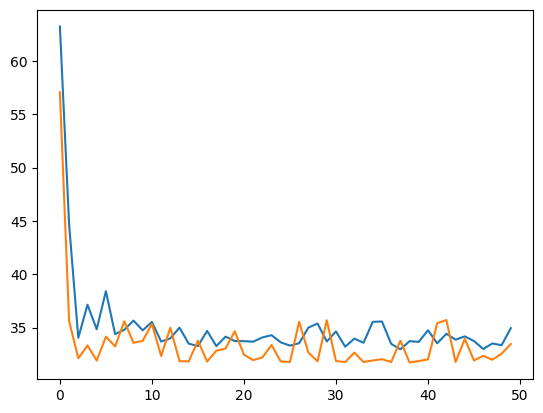

In [73]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

1/1 [==============================] - 0s 32ms/step


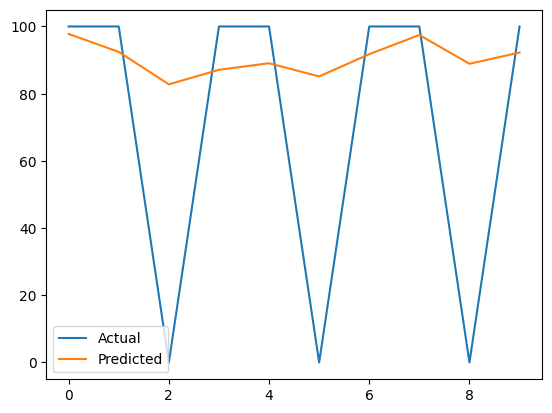

In [84]:
predict_size = 10
prediction = base_ann_model.predict(raw_data.copy()[input_columns][:10])
plt.plot(raw_data.copy()[output_columns][:10], label="Actual")
plt.plot(prediction, label="Predicted")
plt.legend()